### Project Title : - Using Lung ultrasound images for building a reliable Point-of-care Covid-19 testing system

#### Binary Classifier : For classifying lung ultrasound images into one of the two categories : Covid and Non Covid

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


#### Placing images into folders as per their respective category : Covid and Non-Covid

In [ ]:
import shutil
import os
path = "/content/drive/MyDrive/My_Dataset/normal"
d_path = "/content/drive/MyDrive/My_Dataset/non_covid"

for file in os.listdir(path):
        s = os.path.join(path,file)
        new_path = shutil.move(s,d_path)

path = "/content/drive/MyDrive/My_Dataset/pneumonia"
for file in os.listdir(path):
        s = os.path.join(path,file)
        new_path = shutil.move(s,d_path)

In [ ]:
import os
files = os.listdir("/content/drive/MyDrive/My_Dataset/covid")
file_count = len(files)
print("Class Covid : ",file_count)

files = os.listdir("/content/drive/MyDrive/My_Dataset/non_covid")
file_count = len(files)
print("Class Non-Covid : ",file_count)


Class Covid :  3995
Class Non-Covid :  11803


#### Splitting the dataset into training, testing and validation

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

#Splitting the entire dataset into training, testing and validation folders

splitfolders.ratio('/content/drive/MyDrive/Try',output ='binary_try', ratio = (.7,0.1,0.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  2.85 files/s]
Copying files: 2 files [00:00,  3.83 files/s]
Copying files: 3 files [00:00,  3.23 files/s]
Copying files: 4 files [00:01,  3.62 files/s]
Copying files: 5 files [00:01,  3.61 files/s]
Copying files: 6 files [00:01,  4.15 files/s]
Copying files: 7 files [00:01,  4.43 files/s]
Copying files: 8 files [00:02,  4.06 files/s]
Copying files: 9 files [00:02,  3.87 files/s]
Copying files: 10 files [00:02,  3.70 files/s]
Copying files: 11 files [00:02,  4.05 files/s]
Copying files: 12 files [00:03,  3.83 files/s]
Copying files: 13 files [00:03,  3.71 files/s]
Copying files: 14 files [00:03,  4.10 files/s]
Copying files: 15 files [00:03,  4.40 files/s]
Copying files: 16 files [00:04,  4.22 files/s]
Copying files: 17 files [00:04,  3.58 files/s]
Copying files: 18 files [00:04,  3.56 files/s]
Copying files: 19 files [00:05,  3.45 files/s]
Copying files: 20 files [00:05,  3.64 files/s]
Copying files: 21 files [0

#### Dataset verification

In [ ]:
import os
print("Training dataset")
files = os.listdir("/content/drive/MyDrive/binary_try/train/covid")
file_count = len(files)
print("Class Covid : ",file_count)

files = os.listdir("/content/drive/MyDrive/binary_try/train/non_covid")
file_count = len(files)
print("Class Non Covid: ",file_count)



print("---------------------")
print("Testing dataset")
files = os.listdir("/content/drive/MyDrive/binary_try/test/covid")
file_count = len(files)
print("Class Covid : ",file_count)

files = os.listdir("/content/drive/MyDrive/binary_try/test/non_covid")
file_count = len(files)
print("Class Non Covid: ",file_count)


print("---------------------")
print("Validation dataset")
files = os.listdir("/content/drive/MyDrive/binary_try/val/covid")
file_count = len(files)
print("Class Covid : ",file_count)

files = os.listdir("/content/drive/MyDrive/binary_try/val/non_covid")
file_count = len(files)
print("Class Non Covid: ",file_count)



Training dataset
Class Covid :  1400
Class Non Covid:  1400
---------------------
Testing dataset
Class Covid :  400
Class Non Covid:  400
---------------------
Validation dataset
Class Covid :  200
Class Non Covid:  200


#### Dataset Loading and Pre-processing

In [ ]:
#Importing the necessary libraries

import pathlib
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Creating path for dataset folders
p = Path().cwd()
q = p/'binary_split'

#Images would be fed into the model as a batch of this size
batch_size = 512

#Rescaling the pixel values
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)


#Creating data generators for all the three datasets

train_generator = train_datagen.flow_from_directory(q/'train',target_size=(197,198), batch_size= batch_size,class_mode ='categorical',shuffle = True)

test_generator = test_datagen.flow_from_directory(q/'test',target_size= (197,198), batch_size= batch_size,class_mode ='categorical')

val_generator = val_datagen.flow_from_directory(q/'val',target_size=(197,198), batch_size= batch_size,class_mode ='categorical')

# confirm the iterator works

batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Found 2800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Batch shape=(512, 197, 198, 3), min=0.000, max=1.000


#### Creating and training a baseline model - VGG16 with data augmentation

In [ ]:
pretrained= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(197,198,3), weights='imagenet')

pretrained.trainable=False


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(197,198,3))
x = pretrained(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024)(x)
x = tf.keras.layers.Dense(512)(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

multi_vgg16 = tf.keras.Model(inputs, outputs)

multi_vgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 197, 198, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 1024)              18875392  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 34,115,906
Trainable params: 19,401,218
Non-tra

In [ ]:
multi_vgg16.compile(loss="categorical_crossentropy",optimizer= tf.keras.optimizers.Adam(lr=1e-5) , metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
baseline_model = multi_vgg16.fit( train_generator,steps_per_epoch = len(train_generator),epochs= 3 , validation_data= val_generator,
             validation_steps = len(val_generator))

Epoch 1/3
6/6 [==============================] - 398s 60s/step - loss: 0.5526 - accuracy: 0.7304 - val_loss: 0.4111 - val_accuracy: 0.9275
Epoch 2/3
6/6 [==============================] - 28s 4s/step - loss: 0.3497 - accuracy: 0.9100 - val_loss: 0.2766 - val_accuracy: 0.9550
Epoch 3/3
6/6 [==============================] - 28s 5s/step - loss: 0.2415 - accuracy: 0.9675 - val_loss: 0.2042 - val_accuracy: 0.9575


#### Testing the baseline model on testing data

In [ ]:
final_loss, final_acc = multi_vgg16.evaluate(test_generator)
print("Test accuracy  : ",final_acc)

7/7 [==============================] - 503s 83s/step - loss: 0.6772 - accuracy: 0.7596
Test accuracy  :  0.7595697641372681


In [ ]:
predict = multi_vgg16.predict(
    test_generator, steps=None, callbacks=None, max_queue_size=10, workers=1,
    use_multiprocessing=False, verbose=0
)

In [ ]:
import numpy as np
vgg_pred_classes_ft = np.argmax(predict, axis=1)

In [ ]:
vgg_pred_classes_ft

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

predict = multi_vgg16.predict(
    test_generator, steps=None, callbacks=None, max_queue_size=10, workers=1,
    use_multiprocessing=False, verbose=0
)
vgg_pred_classes_ft = np.argmax(predict, axis=1)

true_classes = test_generator.classes


print("Precision score is ", average_precision_score(true_classes, vgg_pred_classes_ft))
print("Accuracy score is ", accuracy_score(true_classes, vgg_pred_classes_ft))
print("Recall is ",recall_score(true_classes, vgg_pred_classes_ft))
print("F1 score is ",f1_score(true_classes, vgg_pred_classes_ft))

Precision score is  0.48760224274406333
Accuracy score is  0.47375
Recall is  0.4475
F1 score is  0.4595635430038511


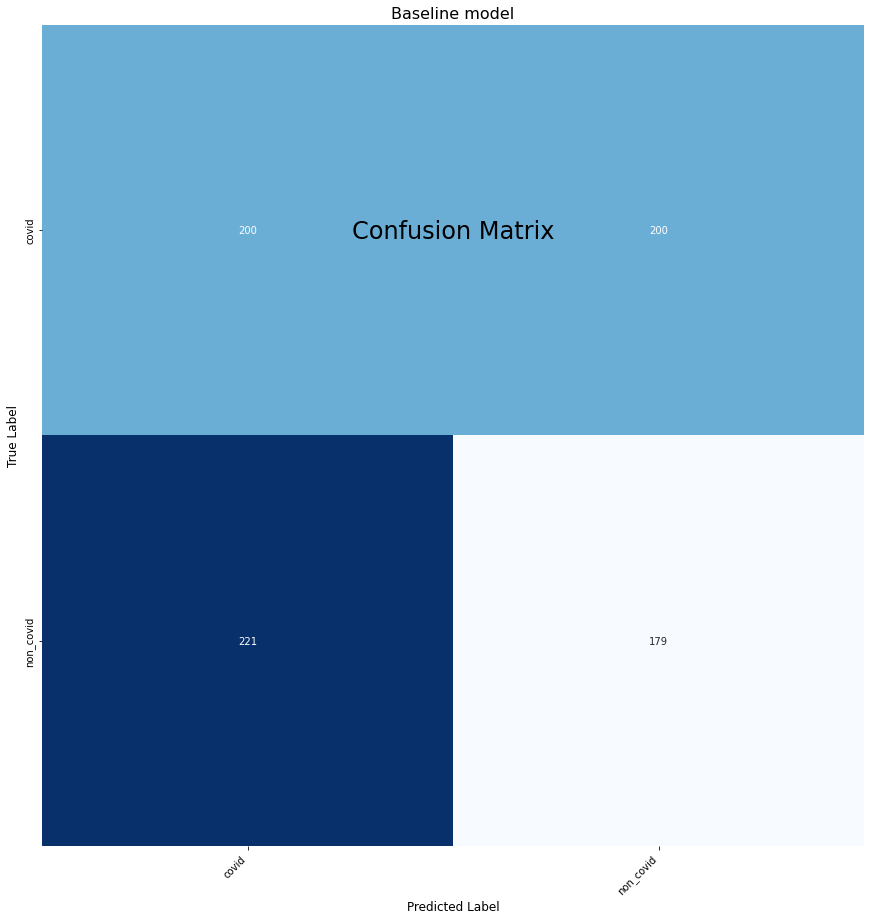

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Get the names of the ten classes
class_names = test_generator.class_indices.keys()

true_classes = test_generator.classes

class_names = test_generator.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10))

plot_heatmap(true_classes, vgg_pred_classes_ft, class_names, ax1, title="Baseline model")    

fig.suptitle("Confusion Matrix", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()

#### Baseline model's performance on training and validation data

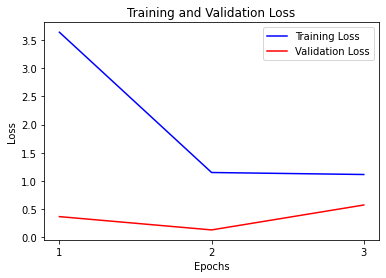

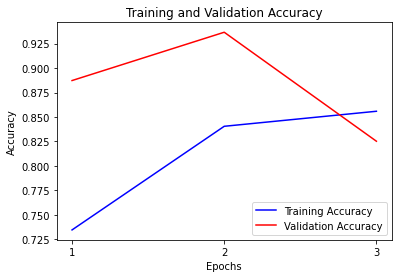

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Comparison of training and validation loss per epoch

history_dict = baseline_model.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()


#Comparison of training and validation accuracy per epoch

# As above, but this time we want to visualize the training and validation accuracy

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### TRYING EFFECIENT NET


In [ ]:
import tensorflow as tf

pretrained = tf.keras.applications.EfficientNetB0(include_top=False,
                   input_shape=(224,224,3), weights='imagenet')

pretrained.trainable=False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(224,224,3))
x = pretrained(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024)(x)
x = tf.keras.layers.Dense(512)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

eff = tf.keras.Model(inputs, outputs)

eff.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 68,801,188
Trainable params: 64,751,617
Non-tra

In [ ]:
eff.compile(loss="binary_crossentropy",optimizer="rmsprop", metrics=["accuracy"])


In [ ]:
baseline_model = eff.fit( train_generator,steps_per_epoch = len(train_generator),epochs= 3 , validation_data= val_generator,
             validation_steps = len(val_generator))

Epoch 1/3


InvalidArgumentError: ignored

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

vgg_preds_ft = eff.predict(test_generator)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)

true_classes = test_generator.classes

print("Accuracy score is ", accuracy_score(true_classes, vgg_pred_classes_ft))
print("Precision score is ", average_precision_score(true_classes, vgg_pred_classes_ft))
print("Recall is ",recall_score(true_classes, vgg_pred_classes_ft))
print("F1 score is ",f1_score(true_classes, vgg_pred_classes_ft))

Accuracy score is  0.2530844669408415
Precision score is  0.7469155330591585
Recall is  0.0
F1 score is  0.0


In [ ]:
vgg_pred_classes_ft

array([0, 0, 0, ..., 0, 0, 0])

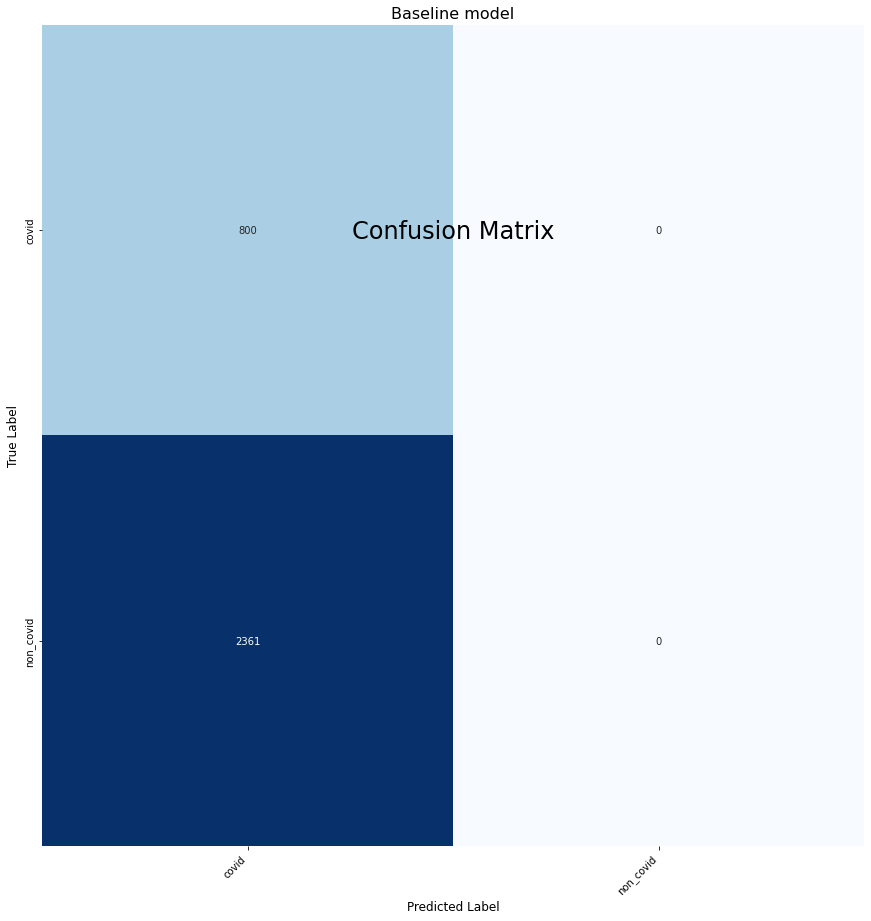

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Get the names of the ten classes
class_names = test_generator.class_indices.keys()

true_classes = test_generator.classes

class_names = test_generator.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10))

plot_heatmap(true_classes, vgg_pred_classes_ft, class_names, ax1, title="Baseline model")    

fig.suptitle("Confusion Matrix", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()

### TRYING INCEPTION V3

In [ ]:
import tensorflow as tf

pretrained = tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(224,224,3), weights='imagenet')

pretrained.trainable=False

In [ ]:
inputs = tf.keras.Input(shape=(224,224,3))
x = pretrained(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024)(x)
x = tf.keras.layers.Dense(512)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

inc = tf.keras.Model(inputs, outputs)

inc.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              52429824  
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74,757,921
Trainable params: 52,955,137
Non-tra

In [ ]:
inc.compile(loss="binary_crossentropy",optimizer="rmsprop", metrics=["accuracy"])


In [ ]:
baseline_model = inc.fit( train_generator,steps_per_epoch = len(train_generator),epochs= 3 , validation_data= val_generator,
             validation_steps = len(val_generator))

Epoch 1/3
 6/22 [=======>......................] - ETA: 13:57 - loss: 1259.7103 - accuracy: 0.5648